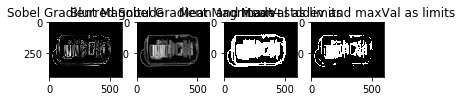

-1

In [5]:
# import the necessary packages
import numpy as np
import cv2
import easygui
from matplotlib import pyplot as plt
 
# Load the image and convert it to grayscale
f = easygui.fileopenbox()
image = cv2.imread(f)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# Sobel gradients for x an y direction of the image
X2 = cv2.Sobel(gray, ddepth = cv2.CV_64F, dx = 1, dy = 0, ksize = -1)
Y2 = cv2.Sobel(gray, ddepth = cv2.CV_64F, dx = 0, dy = 1, ksize = -1)
 
# Sobel gradient magnitude (normalised to 0-3)
grad_sobel=np.sqrt(X2*X2+Y2*Y2)
cv2.normalize(grad_sobel, grad_sobel, 0, 3, cv2.NORM_MINMAX)
 
# Show Sobel Gradient Magnitude result
plt.subplot(141),plt.imshow(grad_sobel,'gray'),plt.title('Sobel Gradient Magnitude')
 
# Blur and threshold the gradient magnitude
blurred = cv2.blur(grad_sobel, (10, 10))
 
# Show blurring result
plt.subplot(142),plt.imshow(blurred,'gray'),plt.title('Blurred Sobel Gradient Magnitude')
 
# Extract minimum and maximum values of the pixels from 'Blurred Sobel Gradient Magnitude'
(minVal, maxVal, _, _) = cv2.minMaxLoc(blurred)
 
# Extract mean and standard deviation values of the pixels from 'Blurred Sobel Gradient Magnitude'
(mean, stddev) = cv2.meanStdDev(blurred)
 
# Apply different threshold:
# 1. mean and maxVal as lower and upper limits
# 2. mean+stddev and maxVal as lower and upper limits
(_, thresh1) = cv2.threshold(blurred, mean, maxVal, cv2.THRESH_BINARY)
(_, thresh2) = cv2.threshold(blurred, mean+stddev, maxVal, cv2.THRESH_BINARY)
 
# Plot the different thresholds
plt.subplot(143),plt.imshow(thresh1,'gray'),plt.title('Mean and maxVal as limits')
plt.subplot(144),plt.imshow(thresh2,'gray'),plt.title('Mean+stddev and maxVal as limits')
 
plt.show()
cv2.waitKey(0)